In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None, encoding = 'utf-8')
titles.head()

title  year
0  Torab al-ghoraba  1998
1  Long zai tian ya  1989
2          Jewtopia  2012
3         Baby Face  1959
4   The Lucky Break  2014

In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None,encoding = 'utf-8')
cast.head()

title  year       name   type character   n
0                    Suuri illusioni  1985     Homo $  actor    Guests  22
1     Gangsta Rap: The Glockumentary  2007  Too $hort  actor   Himself NaN
2                  Menace II Society  1993  Too $hort  actor   Lew-Loc  27
3  Porndogs: The Adventures of Sadie  2009  Too $hort  actor     Bosco   3
4                 Stop Pepper Palmer  2014  Too $hort  actor   Himself NaN

### How many movies are listed in the titles dataframe?

In [5]:
len(titles)

216537

### What are the earliest two films listed in the titles dataframe?

In [6]:
titlessort = titles.sort_values('year')
titlessort[:2]

title  year
48057                                       Miss Jerry  1894
153623  Reproduction of the Corbett and Jeffries Fight  1899

In [7]:
titlessort.head(2)

title  year
48057                                       Miss Jerry  1894
153623  Reproduction of the Corbett and Jeffries Fight  1899

### How many movies have the title "Hamlet"?

In [8]:
titlesHamlet = titles.title.str.startswith('Hamlet')
len(titles[titlesHamlet])

41

In [9]:
len(titles[titles.title == 'Hamlet'])

19

### How many movies are titled "North by Northwest"?

In [10]:
len(titles[titles.title == 'North by Northwest'])

1

### When was the first movie titled "Hamlet" made?

In [11]:
titles[titles.title == 'Hamlet'].sort_values('year').head(1)

title  year
135546  Hamlet  1910

### List all of the "Treasure Island" movies from earliest to most recent.

In [12]:
titles[titles.title == 'Treasure Island'].sort_values('year')

title  year
211730  Treasure Island  1918
47230   Treasure Island  1920
84062   Treasure Island  1934
189248  Treasure Island  1950
152272  Treasure Island  1972
90433   Treasure Island  1973
10481   Treasure Island  1985
109135  Treasure Island  1999

### How many movies were made in the year 1950?

In [13]:
len(titles[titles.year == 1950])

1037

### How many movies were made in the year 1960?

In [14]:
len(titles[titles.year == 1960])

1476

### How many movies were made from 1950 through 1959?

In [15]:
len(titles[(titles.year >= 1950) & (titles.year <=1959)])

12197

### In what years has a movie titled "Batman" been released?

In [16]:
titles[titles.title == 'Batman'].year

6268      1943
173516    1989
Name: year, dtype: int64

### How many roles were there in the movie "Inception"?

In [17]:
len(cast[cast.title == 'Inception'])

75

### How many roles in the movie "Inception" are NOT ranked by an "n" value?

In [18]:
c = cast
c = c[c.title == 'Inception']
len(c[c.n.isnull()])

24

### But how many roles in the movie "Inception" did receive an "n" value?

In [19]:
c = cast
c = c[c.title == 'Inception']
len(c[c.n.notnull()])

51

### Display the cast of "North by Northwest" in their correct "n"-value order, ignoring roles that did not earn a numeric "n" value.

In [20]:
c = cast
c = c[c.title == 'North by Northwest']
c = c[c.n.notnull()].sort_values('n')
c

title  year                  name     type  \
789568   North by Northwest  1959            Cary Grant    actor   
3150433  North by Northwest  1959       Eva Marie Saint  actress   
1319736  North by Northwest  1959           James Mason    actor   
2835733  North by Northwest  1959   Jessie Royce Landis  actress   
322095   North by Northwest  1959        Leo G. Carroll    actor   
2742072  North by Northwest  1959  Josephine Hutchinson  actress   
1536035  North by Northwest  1959           Philip Ober    actor   
1154420  North by Northwest  1959         Martin Landau    actor   
2214182  North by Northwest  1959         Adam Williams    actor   
1640544  North by Northwest  1959          Edward Platt    actor   
602998   North by Northwest  1959     Robert Ellenstein    actor   
2077139  North by Northwest  1959          Les Tremayne    actor   
420055   North by Northwest  1959       Philip Coolidge    actor   
1366775  North by Northwest  1959         Patrick McVey    actor   
185128   North by Northwest  1959          Edward Binns    actor   
1253982  North by Northwest  1959             Ken Lynch    actor   

                           character   n  
789568            Roger O. Thornhill   1  
3150433                  Eve Kendall   2  
1319736              Phillip Vandamm   3  
2835733              Clara Thornhill   4  
322095                 The Professor   5  
2742072                Mrs. Townsend   6  
1536035              Lester Townsend   7  
1154420                      Leonard   8  
2214182                     Valerian   9  
1640544              Victor Larrabee  10  
602998                         Licht  11  
2077139                   Auctioneer  12  
420055                     Dr. Cross  13  
1366775               Sergeant Flamm  14  
185128                Captain Junket  15  
1253982  Charley - Chicago Policeman  16

### Display the entire cast, in "n"-order, of the 1972 film "Sleuth".

In [21]:
c = cast
c = c[(c.year == 1972) & (c.title == 'Sleuth')].sort_values('n')
c

title  year                name     type  \
1545047  Sleuth  1972    Laurence Olivier    actor   
294810   Sleuth  1972       Michael Caine    actor   
337756   Sleuth  1972      Alec Cawthorne    actor   
1327177  Sleuth  1972  John (II) Matthews    actor   
2458449  Sleuth  1972  Eve (III) Channing  actress   
1312188  Sleuth  1972        Teddy Martin    actor   

                          character  n  
1545047                 Andrew Wyke  1  
294810                  Milo Tindle  2  
337756            Inspector Doppler  3  
1327177  Detective Sergeant Tarrant  4  
2458449             Marguerite Wyke  5  
1312188      Police Constable Higgs  6

### Now display the entire cast, in "n"-order, of the 2007 version of "Sleuth".

In [22]:
c = cast
c = cast[cast.title == 2007]
c = c[c.title == 'Sleuth'].sort_values('n')
c

Empty DataFrame
Columns: [title, year, name, type, character, n]
Index: []

### How many roles were credited in the silent 1921 version of Hamlet?

In [23]:
c = cast
len(c[(c.title == 'Hamlet') & (c.year == 1921)])

9

### How many roles were credited in Branagh’s 1996 Hamlet?

In [24]:
c = cast
len(c[(c.title == 'Hamlet')&(c.year == 1996)])

54

### How many "Hamlet" roles have been listed in all film credits through history?

In [25]:
c = cast
len(c[c.character =='Hamlet'])

84

### How many people have played an "Ophelia"?

In [57]:
c = cast
len(c[c.character == 'Ophelia'])

100

### How many people have played a role called "The Dude"?

In [58]:
c = cast
len(c[c.character == 'The Dude'])

17

### How many people have played a role called "The Stranger"?

In [59]:
c = cast
len(c[c.character == 'The Stranger'])

192

### How many roles has Sidney Poitier played throughout his career?

In [63]:
c = cast
len(c[c.name == 'Sidney Poitier'])

43

### How many roles has Judi Dench played?

In [64]:
c = cast
len(c[c.name == 'Judi Dench'])

53

### List the supporting roles (having n=2) played by Cary Grant in the 1940s, in order by year.

In [66]:
c = cast
c[(c.n == 2) & (c.name == 'Cary Grant') &(c.year//10*10 == 1940)].sort_values('year')

title  year        name   type    character  n
789565  My Favorite Wife  1940  Cary Grant  actor         Nick  2
789575    Penny Serenade  1941  Cary Grant  actor  Roger Adams  2

### List the leading roles that Cary Grant played in the 1940s in order by year.

In [67]:
c = cast
c[(c.n == 1) & (c.name == 'Cary Grant') &(c.year//10*10 == 1940)].sort_values('year')

title  year        name   type  \
789590               The Howards of Virginia  1940  Cary Grant  actor   
789547                       His Girl Friday  1940  Cary Grant  actor   
789592                The Philadelphia Story  1940  Cary Grant  actor   
789580                             Suspicion  1941  Cary Grant  actor   
789594                  The Talk of the Town  1942  Cary Grant  actor   
789571                 Once Upon a Honeymoon  1942  Cary Grant  actor   
789538                     Destination Tokyo  1943  Cary Grant  actor   
789563                             Mr. Lucky  1943  Cary Grant  actor   
789564                             Mr. Lucky  1943  Cary Grant  actor   
789572                      Once Upon a Time  1944  Cary Grant  actor   
789530                  Arsenic and Old Lace  1944  Cary Grant  actor   
789567             None But the Lonely Heart  1944  Cary Grant  actor   
789566                         Night and Day  1946  Cary Grant  actor   
789569                             Notorious  1946  Cary Grant  actor   
789586      The Bachelor and the Bobby-Soxer  1947  Cary Grant  actor   
789587                     The Bishop's Wife  1947  Cary Grant  actor   
789562  Mr. Blandings Builds His Dream House  1948  Cary Grant  actor   
789542          Every Girl Should Be Married  1948  Cary Grant  actor   
789551                I Was a Male War Bride  1949  Cary Grant  actor   

                    character  n  
789590            Matt Howard  1  
789547           Walter Burns  1  
789592     C. K. Dexter Haven  1  
789580                Johnnie  1  
789594           Leopold Dilg  1  
789571  Patrick 'Pat' O'Toole  1  
789538          Capt. Cassidy  1  
789563              Joe Adams  1  
789564        Joe Bascopolous  1  
789572            Jerry Flynn  1  
789530      Mortimer Brewster  1  
789567             Ernie Mott  1  
789566            Cole Porter  1  
789569                 Devlin  1  
789586            Dick Nugent  1  
789587                 Dudley  1  
789562          Jim Blandings  1  
789542      Dr. Madison Brown  1  
789551    Capt. Henri Rochard  1

### How many roles were available for actors in the 1950s?

In [70]:
c = cast
len(c[(c.type == 'actor') & (c.year//10*10== 1950)])

150803

### How many roles were avilable for actresses in the 1950s?

In [71]:
c =  cast
len(c[(c.type =='actress') & (c.year//10*10 == 1950)])

54838

### How many leading roles (n=1) were available from the beginning of film history through 1980?

In [72]:
c = cast
len(c[(c.n == 1) & (c.year<=1980)])


62245

### How many non-leading roles were available through from the beginning of film history through 1980?

In [73]:
c = cast
len(c[(c.n != 1) & (c.year<=1980)])


1065822

### How many roles through 1980 were minor enough that they did not warrant a numeric "n" rank?

In [74]:
c = cast
len(c[(c.n.isnull()) & (c.year<=1980)])


424732

In [26]:
titles

title  year
0                               Torab al-ghoraba  1998
1                               Long zai tian ya  1989
2                                       Jewtopia  2012
3                                      Baby Face  1959
4                                The Lucky Break  2014
5                                       La perla  1947
6                           Nelson-Wolgast Fight  1910
7                                          Patsy  1917
8                           Saranghae malsoonssi  2005
9                               The Book of Life  1998
10                                   Underground  2007
11                                  Marija's Own  2011
12                                    Euro Kings  2016
13                                    Death Ship  1980
14                                   Ren ba zhao  1977
15                              Juegos de alcoba  1971
16                             Gunnar Hedes saga  1923
17                            Un giglio infranto  1956
18                                Missing Pieces  2016
19                                   Cudzoziemka  1986
20                               Muerte infernal  1992
21                 1-2-3-4 ou Les collants noirs  1961
22                                    Shoreditch  2003
23                                La plage noire  2001
24                               Cheap Champagne  2010
25                           Aman kimse duymasin  1963
26                                    The Skinny  2012
27                                     Long Shot  2002
28                                         Gator  1976
29                               Wo xin shen chu  1976
...                                          ...   ...
216507              I Hate Toronto: A Love Story  2012
216508                                   Intonga  2009
216509                             Morning Glory  1993
216510                                    Dhuaan  2013
216511              The Adventures of Tom Sawyer  1986
216512                      Malice in Wonderland  2009
216513                          Det perfekte kup  2008
216514                                      2:13  2009
216515                      Hills of Missing Men  1922
216516                              Sudhandhiram  2000
216517                              Eve's Leaves  1926
216518                               The Divorce  2014
216519             Don't Call Us, We'll Call You  1971
216520                           ThanksKilling 3  2012
216521                                 Katil kim  1971
216522                          Without Children  1935
216523                              Lo imposible  2012
216524                        Come to the Stable  1949
216525                         Run for Your Life  2015
216526                     Xue ji huang sha zhen  1993
216527                          Brother's Keeper  2002
216528                         Accused of Murder  1956
216529                                   L'amant  2004
216530  Wong Fei Hung II: Nam yee tung chi keung  1992
216531                      Bapu Viru Vategavkar  2009
216532                                  Paradise  2004
216533                               Azmat Sakan  1972
216534                    Grow Up, Tony Phillips  2013
216535                  Emmanuelle: L'antivierge  1975
216536                                 Biberspur  1984

[216537 rows x 2 columns]

In [27]:
len(titles)

216537

In [28]:
h = titles.head(9)
# operations
h

title  year
0      Torab al-ghoraba  1998
1      Long zai tian ya  1989
2              Jewtopia  2012
3             Baby Face  1959
4       The Lucky Break  2014
5              La perla  1947
6  Nelson-Wolgast Fight  1910
7                 Patsy  1917
8  Saranghae malsoonssi  2005

In [29]:
h.head(3)

title  year
0  Torab al-ghoraba  1998
1  Long zai tian ya  1989
2          Jewtopia  2012

In [30]:
h['year'] //10*10

0    1990
1    1980
2    2010
3    1950
4    2010
5    1940
6    1910
7    1910
8    2000
Name: year, dtype: int64

In [31]:
h.year > 1985

0     True
1     True
2     True
3    False
4     True
5    False
6    False
7    False
8     True
Name: year, dtype: bool

In [32]:
h[(h.year < 1980) | (h.year >= 1990)]   
#" or: /"

title  year
0      Torab al-ghoraba  1998
2              Jewtopia  2012
3             Baby Face  1959
4       The Lucky Break  2014
5              La perla  1947
6  Nelson-Wolgast Fight  1910
7                 Patsy  1917
8  Saranghae malsoonssi  2005

In [33]:
t = titles
t[t.title == 'Macbeth'].sort_values('year').tail()

title  year
61785   Macbeth  2013
154685  Macbeth  2014
43656   Macbeth  2015
198858  Macbeth  2016
128239  Macbeth  2017

In [34]:
t.year.sort_values()

48057     1894
153623    1899
204919    1900
89778     1900
247       1900
144124    1900
159831    1903
198400    1905
61041     1905
198026    1906
202531    1906
77316     1906
190559    1906
2124      1906
94072     1907
185545    1907
4114      1907
201306    1907
53180     1908
210113    1908
14659     1908
2326      1908
191906    1908
36135     1908
96859     1909
167850    1909
162508    1909
40234     1909
94941     1909
41262     1909
          ... 
65548     2020
28981     2020
207025    2020
89        2020
71445     2020
80547     2020
7879      2020
96083     2021
18387     2021
189045    2021
127564    2021
1279      2021
11466     2021
21190     2021
18063     2021
74864     2021
180296    2021
138510    2022
104272    2022
14066     2022
185569    2022
64833     2022
132539    2022
59157     2022
196554    2022
115792    2023
189423    2023
110454    2023
19186     2024
211699    2024
Name: year, dtype: int64

In [35]:
h = cast.head()
hnew = h[h.n.notnull()]
hnew.sort(['title','year'])

C:\Users\Ruiye\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


title  year       name   type character   n
2                  Menace II Society  1993  Too $hort  actor   Lew-Loc  27
3  Porndogs: The Adventures of Sadie  2009  Too $hort  actor     Bosco   3
0                    Suuri illusioni  1985     Homo $  actor    Guests  22

In [36]:
'Hamlet(II)'.startswith('Hamlet')

True

In [37]:
h.title.str.startswith('The')

0    False
1    False
2    False
3    False
4    False
Name: title, dtype: bool

In [38]:
c = titles
c[c.title == 'Hamlet']

title  year
20108   Hamlet  1911
23054   Hamlet  2016
53594   Hamlet  1987
65937   Hamlet  1973
74147   Hamlet  2015
80092   Hamlet  1969
92525   Hamlet  1990
95160   Hamlet  2014
100882  Hamlet  1948
103427  Hamlet  2000
123489  Hamlet  1954
135546  Hamlet  1910
153616  Hamlet  1996
168164  Hamlet  2011
177951  Hamlet  1964
191055  Hamlet  2009
202622  Hamlet  1921
208732  Hamlet  1976
213241  Hamlet  1913

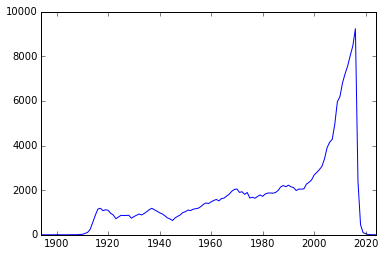

In [39]:
titles.year.value_counts().sort_index().plot()#.plot();

C:\Users\Ruiye\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


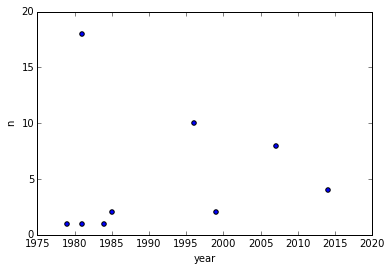

In [40]:
c = cast
c = c[c.character == 'Kermit the Frog']
c.plot(x='year', y = 'n', kind = 'scatter')

In [41]:
c.head()[['year','n']]

year   n
891034  1981  18
891036  1985   2
891040  1981   1
891048  1979   1
891055  1984   1

In [42]:
c = cast.set_index

In [43]:
len(cast)

3383167

In [44]:
%%time
cast[cast.title == 'Sleuth']

Wall time: 195 ms


title  year                 name     type  \
233918   Sleuth  2007      Kenneth Branagh    actor   
294810   Sleuth  1972        Michael Caine    actor   
294811   Sleuth  2007        Michael Caine    actor   
337756   Sleuth  1972       Alec Cawthorne    actor   
337757   Sleuth  2007  Alec (II) Cawthorne    actor   
1171232  Sleuth  2007             Jude Law    actor   
1312188  Sleuth  1972         Teddy Martin    actor   
1327177  Sleuth  1972   John (II) Matthews    actor   
1545047  Sleuth  1972     Laurence Olivier    actor   
1635645  Sleuth  2007        Harold Pinter    actor   
2458448  Sleuth  2007    Eve (II) Channing  actress   
2458449  Sleuth  1972   Eve (III) Channing  actress   
3022053  Sleuth  2007    Carmel O'Sullivan  actress   

                          character   n  
233918            Other Man on T.V. NaN  
294810                  Milo Tindle   2  
294811                       Andrew   1  
337756            Inspector Doppler   3  
337757            Inspector Doppler NaN  
1171232                        Milo   2  
1312188      Police Constable Higgs   6  
1327177  Detective Sergeant Tarrant   4  
1545047                 Andrew Wyke   1  
1635645                 Man on T.V.   3  
2458448             Marguerite Wyke NaN  
2458449             Marguerite Wyke   5  
3022053                      Maggie NaN

In [45]:
c = cast.set_index(['title','year']).sort_index()

In [46]:
%%time
c.loc['Sleuth',1972]

Wall time: 168 ms


name     type                   character  n
title  year                                                            
Sleuth 1972       Michael Caine    actor                 Milo Tindle  2
       1972      Alec Cawthorne    actor           Inspector Doppler  3
       1972        Teddy Martin    actor      Police Constable Higgs  6
       1972  John (II) Matthews    actor  Detective Sergeant Tarrant  4
       1972    Laurence Olivier    actor                 Andrew Wyke  1
       1972  Eve (III) Channing  actress             Marguerite Wyke  5

In [47]:
c.loc[('Sleuth',1972)].reset_index(['year','title'])


title  year                name     type                   character  n
0  Sleuth  1972       Michael Caine    actor                 Milo Tindle  2
1  Sleuth  1972      Alec Cawthorne    actor           Inspector Doppler  3
2  Sleuth  1972        Teddy Martin    actor      Police Constable Higgs  6
3  Sleuth  1972  John (II) Matthews    actor  Detective Sergeant Tarrant  4
4  Sleuth  1972    Laurence Olivier    actor                 Andrew Wyke  1
5  Sleuth  1972  Eve (III) Channing  actress             Marguerite Wyke  5

In [48]:
# Groupby
c = cast
c = c[c.name == 'George Clooney']
c.groupby(c.year//10*10).n.size()

year
1980     2
1990    14
2000    20
2010    11
dtype: int64

In [49]:
c = cast
c.groupby([c.year//10*10,'type']).size()

year  type   
1890  actor           2
      actress         1
1900  actor          54
      actress        16
1910  actor       26788
      actress     15343
1920  actor       47018
      actress     23192
1930  actor      148389
      actress     48477
1940  actor      158390
      actress     50221
1950  actor      150803
      actress     54838
1960  actor      124646
      actress     53789
1970  actor      142324
      actress     62026
1980  actor      186874
      actress     86576
1990  actor      252832
      actress    119776
2000  actor      478039
      actress    257463
2010  actor      574954
      actress    320245
2020  actor          64
      actress        27
dtype: int64

In [50]:
c = cast
c = c[(c.character == 'Kermit the Frog')
     | (c.character == 'Oscar the Grouch')]
g = c.groupby(['character',c.year//10*10]).size()

In [51]:
u = g.unstack(0).fillna(0)
u


C:\Users\Ruiye\Anaconda3\lib\site-packages\pandas\core\index.py:4281: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.sum(name == np.asarray(self.names)) > 1


character  Kermit the Frog  Oscar the Grouch
year                                        
1970                     1                 0
1980                     4                 1
1990                     2                 1
2000                     1                 1
2010                     1                 0

In [52]:

g.unstack()

C:\Users\Ruiye\Anaconda3\lib\site-packages\pandas\core\index.py:4281: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.sum(name == np.asarray(self.names)) > 1


year              1970  1980  1990  2000  2010
character                                     
Kermit the Frog      1     4     2     1     1
Oscar the Grouch   NaN     1     1     1   NaN

In [53]:
u['Kermit the Frog']-u['Oscar the Grouch']

year
1970    1
1980    3
1990    1
2000    0
2010    1
dtype: float64

In [54]:
u.stack()

year  character       
1970  Kermit the Frog     1
      Oscar the Grouch    0
1980  Kermit the Frog     4
      Oscar the Grouch    1
1990  Kermit the Frog     2
      Oscar the Grouch    1
2000  Kermit the Frog     1
      Oscar the Grouch    1
2010  Kermit the Frog     1
      Oscar the Grouch    0
dtype: float64

In [55]:
df = g.unstack('character')
df['extra']=1
df = df.set_index('extra', drop =True, append = True)
df.unstack(0)

C:\Users\Ruiye\Anaconda3\lib\site-packages\pandas\core\index.py:4281: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.sum(name == np.asarray(self.names)) > 1


character Kermit the Frog                     Oscar the Grouch                 \
year                 1970 1980 1990 2000 2010             1970 1980 1990 2000   
extra                                                                           
1                       1    4    2    1    1              NaN    1    1    1   

character       
year      2010  
extra           
1          NaN

In [56]:
g

character         year
Kermit the Frog   1970    1
                  1980    4
                  1990    2
                  2000    1
                  2010    1
Oscar the Grouch  1980    1
                  1990    1
                  2000    1
dtype: int64